In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q '/content/drive/My Drive/HA/Train_hMYJ020.zip'

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [204]:
 
path='/content/train.csv'
tr_data=pd.read_csv(path)

In [205]:
tr_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
tr_data.shape

(318438, 18)

In [ ]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [153]:
tr_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
tr_data.City_Code_Patient

0          7.0
1          7.0
2          7.0
3          7.0
4          7.0
          ... 
318433    23.0
318434     8.0
318435    10.0
318436     8.0
318437     8.0
Name: City_Code_Patient, Length: 318438, dtype: float64

In [ ]:
tr_data['Bed Grade']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
318433    4.0
318434    4.0
318435    4.0
318436    3.0
318437    2.0
Name: Bed Grade, Length: 318438, dtype: float64

In [ ]:
meta=pd.read_csv('/content/train_data_dict.csv')
meta

In [118]:
class Preprocessing:
     def __init__(self):
         pass
     def convertToCategory(self,df):
        cols=df.select_dtypes(['object']).columns
        for col in cols:
           df[col]=df[col].astype('category')
        return df
     def imputeMissingValues(self,df,cols):
         for col in cols:
            df[col]=df[col].fillna(df[col].mode()[0])
    
         return df
     def knnImpute(self, df, cols):
         df[cols]=df[cols].fillna(np.nan)
         KNN(k=10).fit_transform(df[cols])
         return df
     def num_cols(self,df):
        numCols=df.select_dtypes (['int64','float64']).columns
        return numCols
     def get_cat_cols(self,df):
        catCols=df.select_dtypes(['category']).columns
        return catCols
     def convert_num_to_cat(self,df):
        numCols=list(self.num_cols(df))
        
        numCols=list(set(numCols)-set(['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit','patientid','case_id']))
        print(numCols)
        print(len(df))
        for col in numCols:
           print(col, ':',df[col].nunique())
           for col in numCols:
              df[col]=df[col].astype('category')
        return df
     def split_ds(self, features,target):
        ''' Split the dataset into train and test'''
        return train_test_split(features,target,test_size=.3,random_state=42)

In [206]:
pp=Preprocessing ()

In [207]:
data_tr=pp.convertToCategory(tr_data)

In [208]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   case_id                            318438 non-null  int64   
 1   Hospital_code                      318438 non-null  int64   
 2   Hospital_type_code                 318438 non-null  category
 3   City_Code_Hospital                 318438 non-null  int64   
 4   Hospital_region_code               318438 non-null  category
 5   Available Extra Rooms in Hospital  318438 non-null  int64   
 6   Department                         318438 non-null  category
 7   Ward_Type                          318438 non-null  category
 8   Ward_Facility_Code                 318438 non-null  category
 9   Bed Grade                          318325 non-null  float64 
 10  patientid                          318438 non-null  int64   
 11  City_Code_Patient         

In [ ]:
from fancyimpute import KNN

In [209]:
 tr_data_cl=pp.convert_num_to_cat(data_tr)

['City_Code_Hospital', 'Hospital_code', 'Bed Grade', 'City_Code_Patient']
318438
City_Code_Hospital : 11
Hospital_code : 32
Bed Grade : 4
City_Code_Patient : 37


In [210]:
cols=['Bed Grade','City_Code_Patient']
tr_data_imp=pp.imputeMissingValues(tr_data_cl,cols)

In [211]:
tr_data_imp.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [213]:
numCols=list(pp.num_cols(tr_data_imp))
numCols.remove('case_id')
numCols.remove('patientid')
numCols

['Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [214]:
catCols=list(pp.get_cat_cols(tr_data_imp))
catCols.remove('Stay')
catCols

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [215]:
target='Stay'

In [ ]:
class Visualizations:
    def __init__(self):
       pass
    def visualize_uni(self,df,catCols):
       for col in catCols:
         plt.figure()
         df[col].value_counts().plot(kind='bar')
         plt.xlabel(col)
         plt.ylabel('counts')
         plt.show()
    def visualize_bi(self, df,features, target):
       for fea in features:
         plt.figure(figsize=(15,12))
         sns.boxplot(x=df[target], y=df[fea])
         plt.xlabel(target)
         plt.ylabel(fea)
         plt.show()
    def visualize_cat_dist(self, df, numCols,catCols,target):
        for col in numCols[0:3]:
           for c in catCols[0:3]:
              plt.figure(figsize=(15,12))
              sns.barplot(x=c, y=col, hue=target, data=df)
              plt.show()

In [ ]:
viz=Visualizations()

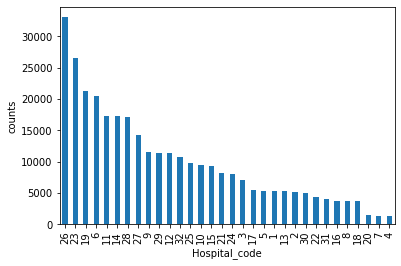

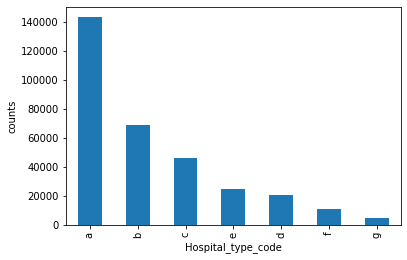

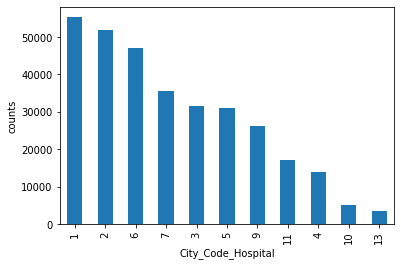

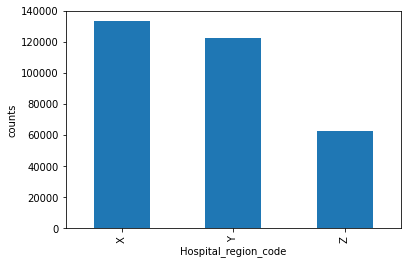

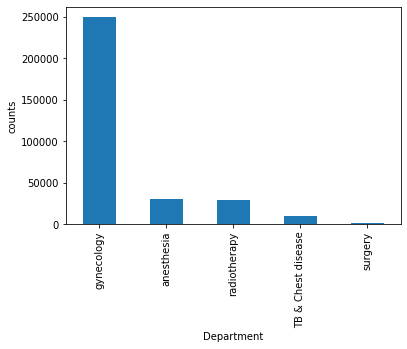

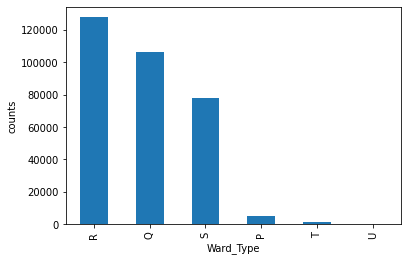

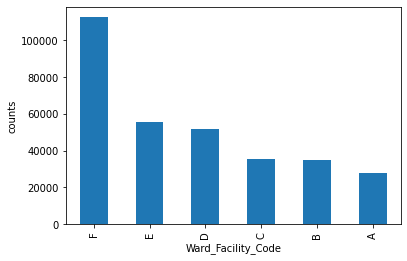

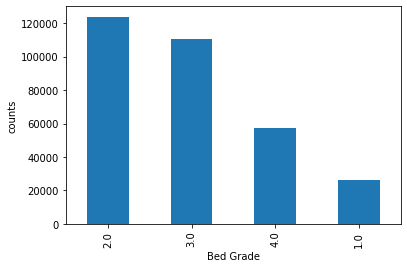

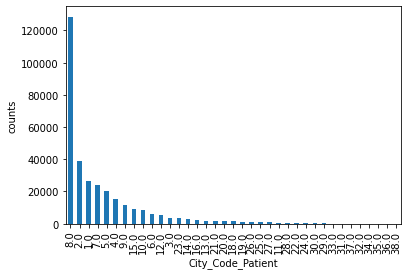

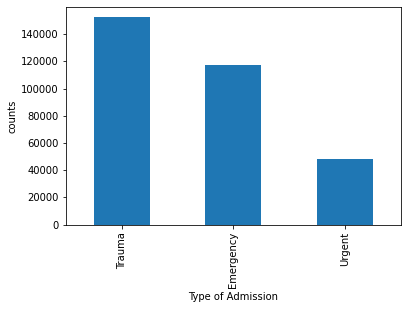

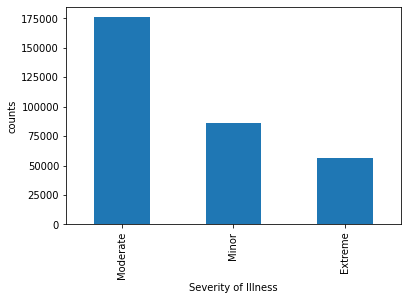

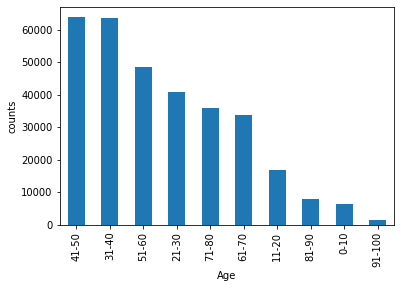

In [ ]:
viz.visualize_uni(tr_data_imp,catCols)

1.There are more records for hospital type a
 
2.Hospitals with region code X and Y have more records.
 
3.Gyneocology has more more records.
 
4.Ward type R has more records
 
5.Trauma type admission has more records.

In [ ]:
#bivariate visualization
viz.visualize_bi(tr_data_imp,numCols, target)

11

In [ ]:
viz.visualize_cat_dist(tr_data_cl,numCols,catCols,target)

In [127]:
class FE:
    def __init__(self):
       pass
    def create_bins(self,n, numCols, df):
       for col in numCols[0:len(numCols)]:
           bins=np.linspace(df[col].min(),df[col].max(),n)
           df[col+'Bin']= pd.cut(df[col],bins, include_lowest=False)
       return df
    def create_pct_grp(self,df,catCols):
         for col in catCols[0:len(catCols)]:
             df[col+'Pct']=100*df[col].groupby(df[col]).transform('count')/len(df[col])
         return df

In [217]:
fe=FE()

In [218]:
tr_data_fe=fe.create_bins(5,numCols,tr_data_imp)

In [219]:
tr_data_fe=fe.create_pct_grp(tr_data_fe, catCols)

In [220]:
tr_data_fe.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Available Extra Rooms in HospitalBin',
       'Visitors with PatientBin', 'Admission_DepositBin', 'Hospital_codePct',
       'Hospital_type_codePct', 'City_Code_HospitalPct',
       'Hospital_region_codePct', 'DepartmentPct', 'Ward_TypePct',
       'Ward_Facility_CodePct', 'Bed GradePct', 'City_Code_PatientPct',
       'Type of AdmissionPct', 'Severity of IllnessPct', 'AgePct'],
      dtype='object')

In [221]:
tr_data_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   case_id                               318438 non-null  int64   
 1   Hospital_code                         318438 non-null  category
 2   Hospital_type_code                    318438 non-null  category
 3   City_Code_Hospital                    318438 non-null  category
 4   Hospital_region_code                  318438 non-null  category
 5   Available Extra Rooms in Hospital     318438 non-null  int64   
 6   Department                            318438 non-null  category
 7   Ward_Type                             318438 non-null  category
 8   Ward_Facility_Code                    318438 non-null  category
 9   Bed Grade                             318438 non-null  category
 10  patientid                             318438 non-null  i

In [222]:
num_cols_new=list(pp.num_cols(tr_data_fe))
num_cols_new=list(set(num_cols_new)-set(['case_id','patientid']))
num_cols_new

['Admission_Deposit',
 'Hospital_region_codePct',
 'Type of AdmissionPct',
 'Ward_Facility_CodePct',
 'City_Code_HospitalPct',
 'AgePct',
 'Visitors with Patient',
 'Hospital_codePct',
 'Hospital_type_codePct',
 'Available Extra Rooms in Hospital',
 'Bed GradePct',
 'City_Code_PatientPct',
 'Ward_TypePct',
 'Severity of IllnessPct',
 'DepartmentPct']

In [223]:
cat_cols_new=list(pp.get_cat_cols(tr_data_fe))
cat_cols_new.remove('Stay')
cat_cols_new

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Available Extra Rooms in HospitalBin',
 'Visitors with PatientBin',
 'Admission_DepositBin']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [274]:
class Encoding:
   def __init__(self):
       self.le=LabelEncoder()
   def one_hot_encode(self, df, catCols):
       ''' encode the categorical variables by 
           One hot encoding'''
       df1=df.copy()
       Ohe_sub=pd.get_dummies(df1[catCols])
       df1.drop(columns=catCols,inplace=True)
       df1=pd.concat([df1,Ohe_sub], axis=1)
       return df1
   def lbl_encode(self,df,target):
       #le=LabelEncoder()
       df[target]=self.le.fit_transform(df[target])
       return df
   def lbl_decode(self,y_pred):
      return self.le.inverse_transform(y_pred)

In [275]:
# one-hot-encode the categorical variables
enc=Encoding()

In [226]:
tr_data_enc=enc.one_hot_encode(tr_data_fe,cat_cols_new)

In [227]:
 len(tr_data_enc.columns)

157

In [276]:
tr_data_enc=enc.lbl_encode(tr_data_enc,target)

In [279]:
 tr_data_enc[target]

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [230]:
#split the dataset
features=tr_data_enc.drop(columns=['case_id','patientid','Stay'])
tar=tr_data_enc[target]

In [231]:
x_train,x_test,y_train,y_test=pp.split_ds(features,tar)

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
class Scaling:
   def __init__(self):
        pass
   def scale(self, df):
     sc=StandardScaler()
     X=sc.fit_transform(df)
     return X

In [232]:
sc=Scaling()

In [233]:
x_train=sc.scale(x_train)
x_test=sc.scale(x_test)

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

In [145]:
class Model:
   def __init__(self):
     pass
   def tune_params(self, params, model, x,y):
       gs=GridSearchCV(estimator=model, param_grid=params,cv=5,verbose=10,scoring='accuracy')
       gs_res=gs.fit(x,y)
       print(gs_res.best_params_)
       return gs_res.best_estimator_
   def predict(self,model, x_test):
      y_pred=model.predict(x_test)
      return y_pred
   def score(self, y_true,y_pred):
      acc=100*accuracy_score(y_true,y_pred)
      return acc

In [178]:
 m=Model()

In [179]:
# random forest classifier
rf=RandomForestClassifier(n_estimators=150,max_features=.5, min_samples_split=6)
n_estimators=[50,100,150]
criterion=['gini','entropy']
max_features=['sqrt',.25,.5]
min_samples_split=[2,4,6]
 
#grid={'n_estimators':n_estimators}
grid={'criterion':criterion}
#grid={'max_features':max_features}
#grid={'min_samples_split':min_samples_split}
 
m_best=m.tune_params(grid,rf,x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... criterion=gini, score=0.404, total= 5.8min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.402, total= 5.8min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.6min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.398, total= 5.8min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.4min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.400, total= 5.8min
[CV] criterion=gini ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 23.2min remaining:    0.0s


[CV] ...................... criterion=gini, score=0.403, total= 5.7min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 28.9min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.402, total= 6.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 35.7min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.400, total= 6.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 42.6min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.397, total= 6.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 49.4min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.397, total= 6.8min
[CV] criterion=entropy ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 56.2min remaining:    0.0s


[CV] ................... criterion=entropy, score=0.403, total= 6.9min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 63.1min finished


{'criterion': 'gini'}


In [180]:
m_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [181]:
#predict 
y_pred=m.predict(m_best, x_test)

In [182]:
# Accuracy on validation set
val_acc=m.score(y_test,y_pred)
val_acc

40.372859356027305

In [183]:
import pickle

In [193]:
fname='rf.sav'
pickle.dump(m_best, open(fname,'wb'))

In [187]:
#Tune xgboost parameters
xgb=XGBClassifier(n_estimators=200,learning_rate=.01, n_jobs=-1, max_depth=4,min_child_weight=6,gamma=0.2, subsample=1, colsample_bytree=1)
max_depth=[4,5,6]
min_child_weight=[4,5,6]
gamma=[0,.1,.2,.3,.4] 
subsample=[.6,.7,.8,.9,1]
colsample_bytree=[.6,.7,.8,.9,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1]
#grid={'max_depth':max_depth}
#grid={'min_child_weight':min_child_weight}
#grid={'gamma':gamma}
#grid={'subsample':subsample}
#grid={'colsample_bytree':colsample_bytree}
grid={'reg_alpha':reg_alpha}

In [188]:
xgb_best=m.tune_params(grid,xgb, x_train[0:50000],y_train[0:50000])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... reg_alpha=1e-05, score=0.407, total= 5.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.8min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.398, total= 5.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.7min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.398, total= 5.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.5min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.402, total= 5.8min
[CV] reg_alpha=1e-05 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 23.3min remaining:    0.0s


[CV] ..................... reg_alpha=1e-05, score=0.401, total= 5.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.0min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.408, total= 5.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 34.8min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.398, total= 5.7min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 40.5min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.399, total= 5.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 46.4min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.402, total= 5.8min
[CV] reg_alpha=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 52.2min remaining:    0.0s


[CV] ...................... reg_alpha=0.01, score=0.401, total= 5.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.407, total= 5.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.398, total= 5.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.399, total= 5.8min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.402, total= 5.7min
[CV] reg_alpha=0.1 ...................................................
[CV] ....................... reg_alpha=0.1, score=0.402, total= 5.8min
[CV] reg_alpha=1 .....................................................
[CV] ......................... reg_alpha=1, score=0.408, total= 5.8min
[CV] reg_alpha=1 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 115.8min finished


{'reg_alpha': 1}


In [189]:
xgb_best.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.2,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 6,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [190]:
y_pred_xgb=m.predict(xgb_best,x_test)

In [191]:
 # Accuracy on validation set
val_acc_xgb=m.score(y_test,y_pred_xgb)
val_acc_xgb

40.30795963656157

In [192]:
fname2='xgb.sav'
pickle.dump(xgb_best, open(fname2,'wb'))

In [194]:
!unzip -q '/content/drive/My Drive/HA/Test_ND2Q3bm.zip'

In [195]:
test_path='/content/test.csv'

In [196]:
tst_data=pd.read_csv(test_path)

In [197]:
tst_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [198]:
tst_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [199]:
 data_tst=pp.convertToCategory(tst_data)

In [200]:
 tst_data_cl=pp.convert_num_to_cat(data_tst)

['City_Code_Hospital', 'Hospital_code', 'Bed Grade', 'City_Code_Patient']
137057
City_Code_Hospital : 11
Hospital_code : 32
Bed Grade : 4
City_Code_Patient : 37


In [201]:
  cols=['Bed Grade','City_Code_Patient']
tst_data_imp=pp.imputeMissingValues(tst_data_cl,cols)

In [234]:
 tst_data_imp.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [235]:
numCols_tst=list(pp.num_cols(tst_data_imp))
numCols_tst.remove('case_id')
numCols_tst.remove('patientid')
numCols_tst

['Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [237]:
catCols_tst=list(pp.get_cat_cols(tst_data_imp))
#catCols_tst.remove('Stay')
catCols_tst

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [238]:
 tst_data_fe=fe.create_bins(5,numCols_tst,tst_data_imp)

In [239]:
tst_data_fe.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Available Extra Rooms in HospitalBin',
       'Visitors with PatientBin', 'Admission_DepositBin'],
      dtype='object')

In [243]:
tst_data_fe=fe.create_pct_grp(tst_data_fe, catCols_tst)

In [244]:
tst_data_fe.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Available Extra Rooms in HospitalBin',
       'Visitors with PatientBin', 'Admission_DepositBin', 'Hospital_codePct',
       'Hospital_type_codePct', 'City_Code_HospitalPct',
       'Hospital_region_codePct', 'DepartmentPct', 'Ward_TypePct',
       'Ward_Facility_CodePct', 'Bed GradePct', 'City_Code_PatientPct',
       'Type of AdmissionPct', 'Severity of IllnessPct', 'AgePct'],
      dtype='object')

In [245]:
 num_cols_new_tst=list(pp.num_cols(tst_data_fe))
num_cols_new_tst=list(set(num_cols_new_tst)-set(['case_id','patientid']))
num_cols_new_tst

['Admission_Deposit',
 'Hospital_region_codePct',
 'Type of AdmissionPct',
 'Ward_Facility_CodePct',
 'City_Code_HospitalPct',
 'AgePct',
 'Visitors with Patient',
 'Hospital_codePct',
 'Hospital_type_codePct',
 'Available Extra Rooms in Hospital',
 'Bed GradePct',
 'City_Code_PatientPct',
 'Ward_TypePct',
 'Severity of IllnessPct',
 'DepartmentPct']

In [246]:
 cat_cols_new_tst=list(pp.get_cat_cols(tst_data_fe))
#cat_cols_new.remove('Stay')
cat_cols_new_tst

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed Grade',
 'City_Code_Patient',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Available Extra Rooms in HospitalBin',
 'Visitors with PatientBin',
 'Admission_DepositBin']

In [263]:
tst_data_enc=enc.one_hot_encode(tst_data_fe,cat_cols_new_tst)

In [264]:
 #split the dataset
features_tst=tst_data_enc.drop(columns=['case_id','patientid'])
#tar_tst=tr_data_enc[target]

In [265]:
 x_test_tst=sc.scale(features_tst)

In [288]:
y_pred_tst=xgb_best.predict(x_test_tst)

In [304]:
le=LabelEncoder()
le.fit_transform(tr_data_fe[target])

array([0, 4, 3, ..., 1, 1, 0])

In [305]:
y_lbl=le.inverse_transform(y_pred_tst)

In [306]:
y_lbl

array(['0-10', '51-60', '21-30', ..., '11-20', '11-20', '51-60'],
      dtype=object)

In [308]:
Stay=pd.DataFrame(y_lbl, columns=['Stay'])

In [309]:
Stay.head()

,Stay
0,0-10
1,51-60
2,21-30
3,21-30
4,51-60


In [310]:
final_res=pd.concat([tst_data['case_id'],Stay],axis=1)

In [311]:
final_res.to_csv

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
